# Build Model

- load tensorflow
- load matplotlib
- load data
- preprocess images to convert pixel values to be between 0 and 1
- define the neural network 
- compile the model

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Preprocess the data
train_images = train_images / 255.0
test_images = test_images / 255.0
raw_train_labels = train_labels
raw_test_labels = test_labels
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

# Define the neural network architecture
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

2023-03-24 08:25:22.327911: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-24 08:25:24.469694: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/extras/CUPTI/lib64:/usr/local/cuda/compat/lib:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-24 08:25:24.469810: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/extras

# Train the model
- for 10 epochs

In [3]:
# Train the model
model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.4327 - accuracy: 0.8484 - val_loss: 1.2337 - val_accuracy: 0.6530
Epoch 2/20
1563/1563 [==============================] - 15s 9ms/step - loss: 0.3868 - accuracy: 0.8666 - val_loss: 1.3470 - val_accuracy: 0.6386
Epoch 3/20
1563/1563 [==============================] - 20s 13ms/step - loss: 0.3411 - accuracy: 0.8805 - val_loss: 1.4655 - val_accuracy: 0.6355
Epoch 4/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.3029 - accuracy: 0.8947 - val_loss: 1.5188 - val_accuracy: 0.6368
Epoch 5/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.2646 - accuracy: 0.9097 - val_loss: 1.6157 - val_accuracy: 0.6337
Epoch 6/20
1563/1563 [==============================] - 15s 9ms/step - loss: 0.2341 - accuracy: 0.9195 - val_loss: 1.7376 - val_accuracy: 0.6260
Epoch 7/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.2005 - accuracy: 0.9320 - val_loss: 1.8259 - va

# Make predictions

- Predict on test set and print labels

313/313 [==============================] - 1s 3ms/step


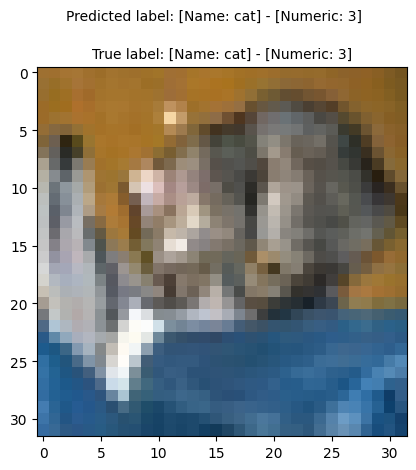

Predicted label: [Name: cat] - [Numeric: 3]
313/313 [==============================] - 1s 3ms/step


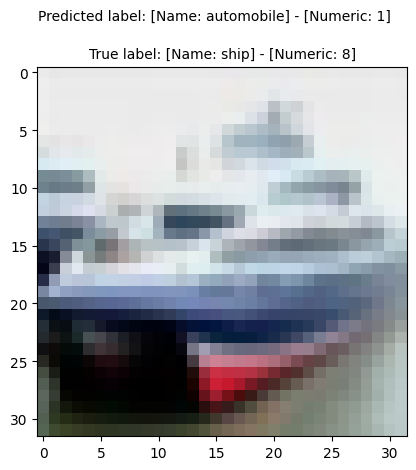

Predicted label: [Name: automobile] - [Numeric: 1]
313/313 [==============================] - 1s 3ms/step


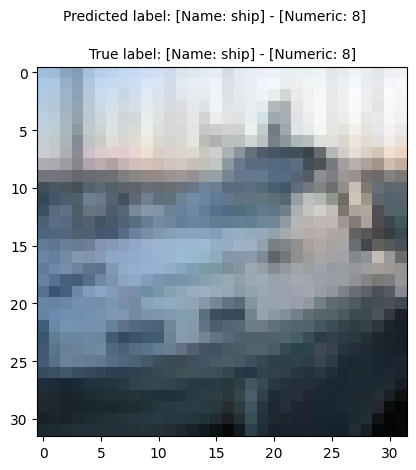

Predicted label: [Name: ship] - [Numeric: 8]
313/313 [==============================] - 1s 3ms/step


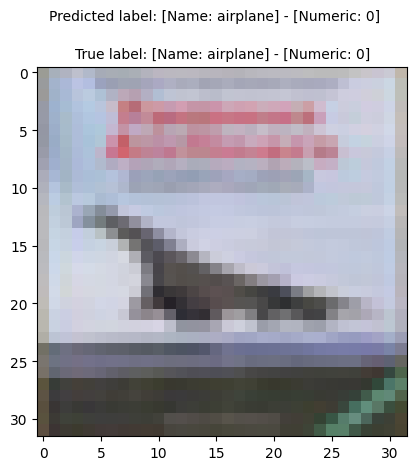

Predicted label: [Name: airplane] - [Numeric: 0]
313/313 [==============================] - 1s 3ms/step


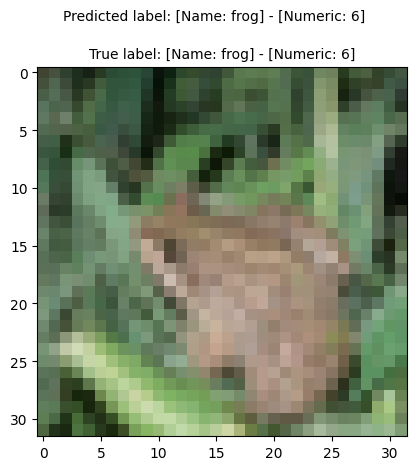

Predicted label: [Name: frog] - [Numeric: 6]
313/313 [==============================] - 1s 3ms/step


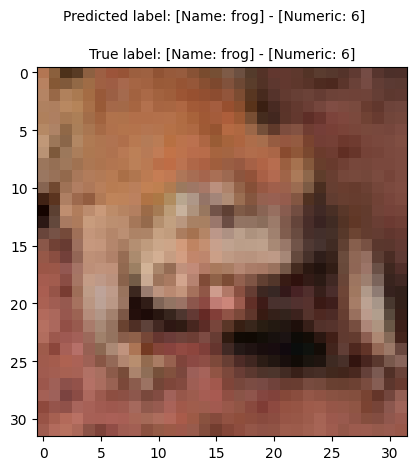

Predicted label: [Name: frog] - [Numeric: 6]
313/313 [==============================] - 1s 3ms/step


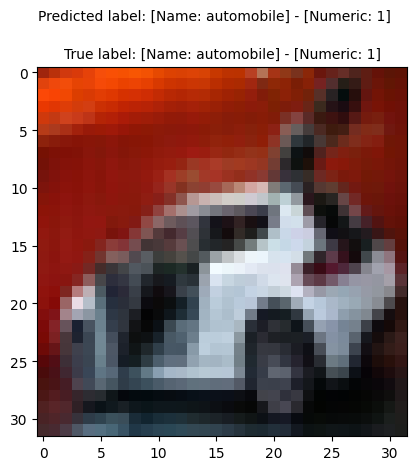

Predicted label: [Name: automobile] - [Numeric: 1]
313/313 [==============================] - 1s 3ms/step


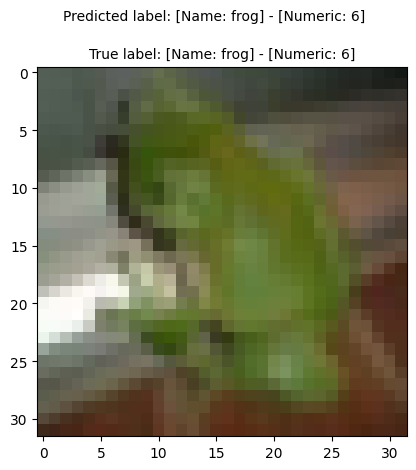

Predicted label: [Name: frog] - [Numeric: 6]
313/313 [==============================] - 1s 3ms/step


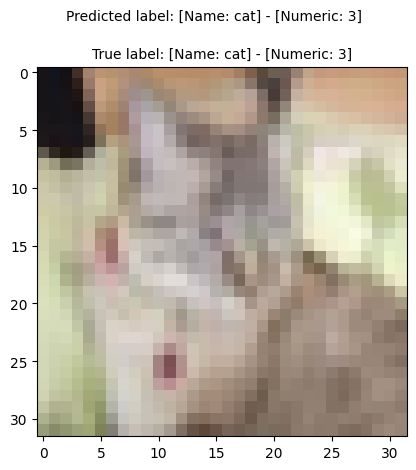

Predicted label: [Name: cat] - [Numeric: 3]
313/313 [==============================] - 1s 3ms/step


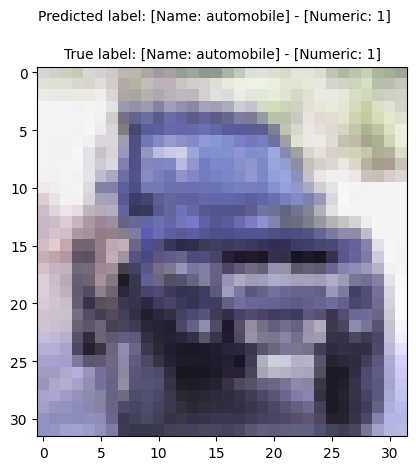

Predicted label: [Name: automobile] - [Numeric: 1]
313/313 [==============================] - 1s 3ms/step


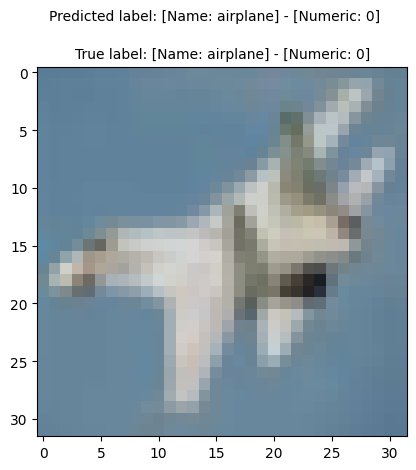

Predicted label: [Name: airplane] - [Numeric: 0]
313/313 [==============================] - 1s 4ms/step


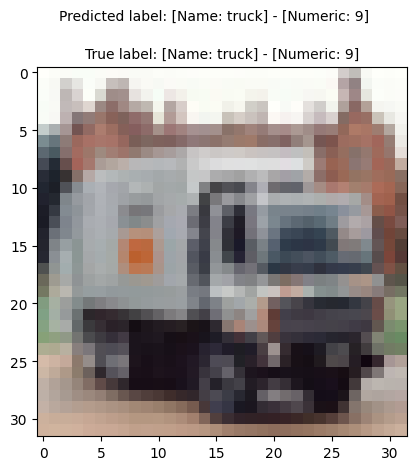

Predicted label: [Name: truck] - [Numeric: 9]


In [9]:
label_names = { 0: 'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}
# Show an example image and its associated class label from the test data
for image_index in range(12):
    plt.imshow(test_images[image_index])
    true_label_string = label_names[raw_test_labels[image_index][0]]
    plt.title(f"True label: [Name: {true_label_string}] - [Numeric: {str(raw_test_labels[image_index][0])}]",fontsize=10)
    predictions = model.predict(test_images)
    predicted_labels = tf.argmax(predictions, axis=1)
    predicted_label_string = label_names[predicted_labels[image_index].numpy()]
    plt.suptitle(f"Predicted label: [Name: {predicted_label_string}] - [Numeric: {str(predicted_labels[image_index].numpy())}]",fontsize=10, y=1)
    plt.show()
    # Make predictions on the test data
    
    # Show the predicted label for the example image
    print(f"Predicted label: [Name: {predicted_label_string}] - [Numeric: {str(predicted_labels[image_index].numpy())}]")

# Evaluate the model on the test data

After training a neural network, it's important to evaluate its performance on unseen data. In this section, we will evaluate the performance of our trained neural network on the test data using several metrics for multi-class classification.

In [10]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 - 2s - loss: 3.1314 - accuracy: 0.6194 - 2s/epoch - 6ms/step
Test loss: 3.131424903869629
Test accuracy: 0.6194000244140625


# Classification Report & Confusion Matrix
- The classification report shows the precision, recall, and F1 score for each class, as well as the accuracy and macro/micro averages.
- The confusion matrix shows the number of true positives, false positives, true negatives, and false negatives for each class.

In [11]:
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions on the test data
predictions = model.predict(test_images)

# Convert one-hot encoded vectors to class labels
predicted_labels = tf.argmax(predictions, axis=1)
true_labels = tf.argmax(test_labels, axis=1)

# Print the classification report
print('Classification Report:')
print(classification_report(true_labels, predicted_labels))

# Print the confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(true_labels, predicted_labels))

313/313 [==============================] - 1s 3ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.73      0.68      1000
           1       0.77      0.70      0.74      1000
           2       0.49      0.49      0.49      1000
           3       0.41      0.47      0.44      1000
           4       0.57      0.56      0.56      1000
           5       0.53      0.45      0.49      1000
           6       0.72      0.62      0.67      1000
           7       0.65      0.72      0.68      1000
           8       0.78      0.71      0.75      1000
           9       0.66      0.76      0.71      1000

    accuracy                           0.62     10000
   macro avg       0.62      0.62      0.62     10000
weighted avg       0.62      0.62      0.62     10000

Confusion Matrix:
[[727  15  50  20  23  17  13  19  62  54]
 [ 48 702  12  17   1   6  10  12  40 152]
 [ 93  12 486  96  94  66  59  62  18  14]
 [ 29  19  89 47

In [12]:
# install seaborn for heatmap
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 2.3 MB/s eta 0:00:0000:0100:01


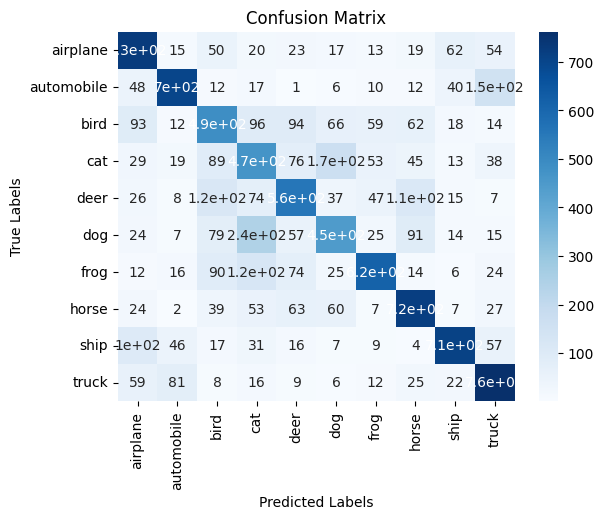

In [13]:
import seaborn as sns

# Define the label names
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Create a heatmap of the confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=label_names, yticklabels=label_names)

# Add labels and title to the heatmap
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()